# Multilayer Perceptrons
MLPs aka (vanilla) feed-forward neural networks, or sometimes just neural networks

1. MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision
1. In an MLP weighted sums are computed multiple times from input to yield output
1. Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model a nonlinear function is applied to the result: relu or tanh
1. Data must be properly scaled before training

**Disadvantages**
1. Large Neural Networks take long to train
1. They also require careful preprocessing of the data
1. Similarly to SVMs, they work best with “homogeneous” data (Else we must use Tree based models)
1. Tuning neural network parameters is also an art unto itself

> http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [1]:
import pandas as pd

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
iris_df = pd.read_csv('../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
X = iris_df.iloc[:, :-1]
y = iris_df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
mlp = MLPClassifier(solver = "lbfgs", max_iter = 10000, hidden_layer_sizes = (10, 100, 200), alpha = 10).fit(X_train, y_train)
mlp

MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 100, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [6]:
y_pred = mlp.predict(X_test)
y_pred

array(['setosa', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor'],
      dtype='<U10')

In [7]:
accuracy_score(y_test, y_pred)

1.0

In [8]:
accuracy_score(y_train, mlp.predict(X_train))

0.9464285714285714

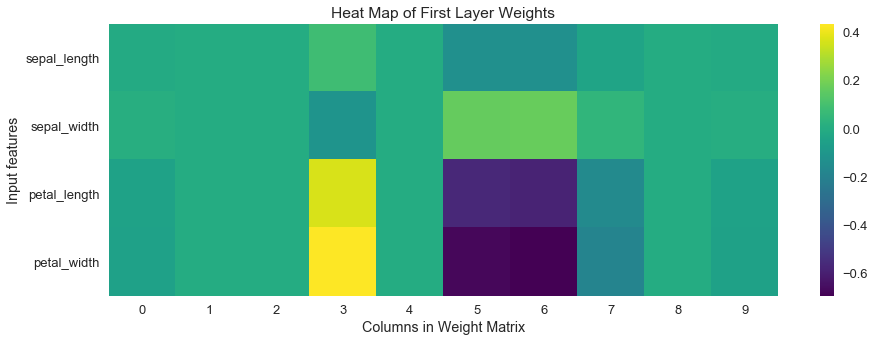

In [9]:
sns.set_context('talk')

plt.figure(figsize = (15, 5))

sns.heatmap(mlp.coefs_[0], cmap = 'viridis')    # Heat Map of First Layer

plt.title("Heat Map of First Layer Weights")
plt.yticks([0.5, 1.5, 2.5, 3.5], iris_df.columns, rotation = 0)
plt.xlabel("Columns in Weight Matrix")
plt.ylabel("Input features")

plt.show()

# Observation
1. It seems sepal_length & sepal_width don't contribute much in determining the species as they have low weights